# Case Study on MLOps

1. What is MLOps?
- MLOps stands for Machine Learning Operations. MLOps is a core function of Machine Learning engineering, focused on streamlining the process of taking machine learning models to production, and then maintaining and monitoring them.

2. Why MLOps is required?
- MLOps accounts for the unique aspects of AI/ML projects in project management, CI/CD, and quality assurance, helping us improve delivery time, reduce defects, and make data science more productive. MLOps refers to a methodology that is built on applying DevOps practices to machine learning workloads.

3. How to implement it?
- It can be implemented using some common tools like
    - MLFlow
    - Kubeflow
    - Sklearn
    - GCP
    - AWS
    - Azure

#### <font color="green">In this case study MLFlow tool is utilized to showcase MLOps with a dataset from Telecom domain</font>

4. What is MLFlow and its Components

MLFLow is an open source platform to manage the ML lifecycle, including experimentation, reproducibility, deployment, and a central model registry. MLFLow currently offers four components:

<img src="images/mlflow.png">

#### <font color="green">Let us know utilize the dataset from https://www.kaggle.com/datasets/blastchar/telco-customer-churn to implment using MLFlow</font>


### Domain: Telecom

### Context: 
A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.

### Data Description: 
Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### Import and warehouse data: 

- Import all the given datasets from MYSQL server. Explore shape and size. 
- Merge all datasets onto one and explore final shape and size.
- Save the merged dataset locally

    - Use MySQL Workbench or MYSQL Server to fetch the data onto python

In [1]:
# Import required libraries

import mysql.connector

# importing 'mysql.connector' as mysql for convenient
import mysql.connector as mysql

# open terminal in mac and put "pip install PyMySQL"
import pymysql.cursors
import pymysql



# Connection setup
MYSQL_Connection = pymysql.connect(host='127.0.0.1',
                             user='root',
                             password='password',
                             db='Test_db'
                             )

print(MYSQL_Connection)

In [2]:
# Import data from MY SQL server (Data Ingestion)

import numpy as np
import pandas as pd

df1 = pd.read_sql('SELECT * FROM tc_churn1', con=MYSQL_Connection)
df2 = pd.read_sql('SELECT * FROM tc_churn2', con=MYSQL_Connection)

print(df1.head())
print('-'*100)
print(df2.head())

print("\n Dataframe 1:",df1.shape)
print("\n Dataframe 2:",df2.shape)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  
2                No             DSL            Yes  
3  No phone service             DSL            Yes  
4                No     Fiber optic             No  
----------------------------------------------------------------------------------------------------
   customerID OnlineBackup DeviceProtection TechSupport StreamingTV  \
0  7590-VHVEG          Yes   

In [12]:
# Data Transformation - Merging dataframe1 and dataframe2 on common curstomerID
df_merged = pd.merge(df1, df2, on='customerID', sort=False)

print("\nMerged Data :",df_merged.shape)
df_merged.head()


Merged Data : (7032, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# Saving the data temporarily onto local system
df1.to_csv('data/data1.csv', index=False)
df2.to_csv('data/data2.csv', index=False)
df_merged.to_csv('data/data.csv', index=False)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Using python to query

https://dev.mysql.com/doc/connector-python/en/connector-python-example-cursor-transaction.html

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Data Pre-processing / cleansing: 

- Missing value treatment
- Convert categorical attributes to continuous using relevant functional knowledge
- Drop attribute/s if required using relevant functional knowledge
- Automate all the above steps

In [14]:
# Import and Explore data 
df = pd.read_csv('data/data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#### No missing values in the features and most of the columns are said to be object type, which has to be converted to int/float before passing onto the model

In [16]:
### Missing value checking and treatment if needed
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
### Identifying categorical and numerical columns

cat_col = []
num_col = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)
print('\n Numerical Columns:', num_col)
print('\n Categorical Columns:', cat_col)


 Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

 Categorical Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [18]:
### As there are no missing values let us check for special  characters
from colorama import Fore, Back, Style
for j in cat_col: 
    print(Fore.YELLOW+'\n column:', j)
    print(Fore.WHITE+'\n',df[df[j].str.contains(r'[@#&$%+-/*]')])
    print(Fore.LIGHTBLUE_EX+'-'*180)


 column: customerID

       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7027  6840-RESVB    Male              0     Yes        Yes      24   
7028  2234-XADUH  Female              0     Yes        Yes      72   
7029  4801-JZAZL  Female              0     Yes        Yes      11   
7030  8361-LTMKD    Male              1     Yes         No       4   
7031  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL          

#### No special characters apart from customerID column in the dataset so we can remove that column alone and then proceed for further preprocessing

In [19]:
### First let us convert categorical features to numerical features

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in cat_col:
    df[col] = le.fit_transform(df[col])

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [20]:
### Columns to be removed
# customerID has unique values, so it can be removed for model training

df = df.drop(['customerID'], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Data analysis & visualisation:

- Performing detailed statistical analysis on the data.
- Performing a detailed univariate, bivariate and multivariate analysis.

In [21]:
# Now that all the features are numerical, let us perform detailed statistical analysis on the data.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
MultipleLines,7032.0,0.940557,0.948627,0.00,0.0000,1.000,2.0000,2.00
InternetService,7032.0,0.872582,0.737271,0.00,0.0000,1.000,1.0000,2.00
OnlineSecurity,7032.0,0.789249,0.859962,0.00,0.0000,1.000,2.0000,2.00
OnlineBackup,7032.0,0.905859,0.880394,0.00,0.0000,1.000,2.0000,2.00


### Performing detailed univariate, bivariate and multivariate analysis. 

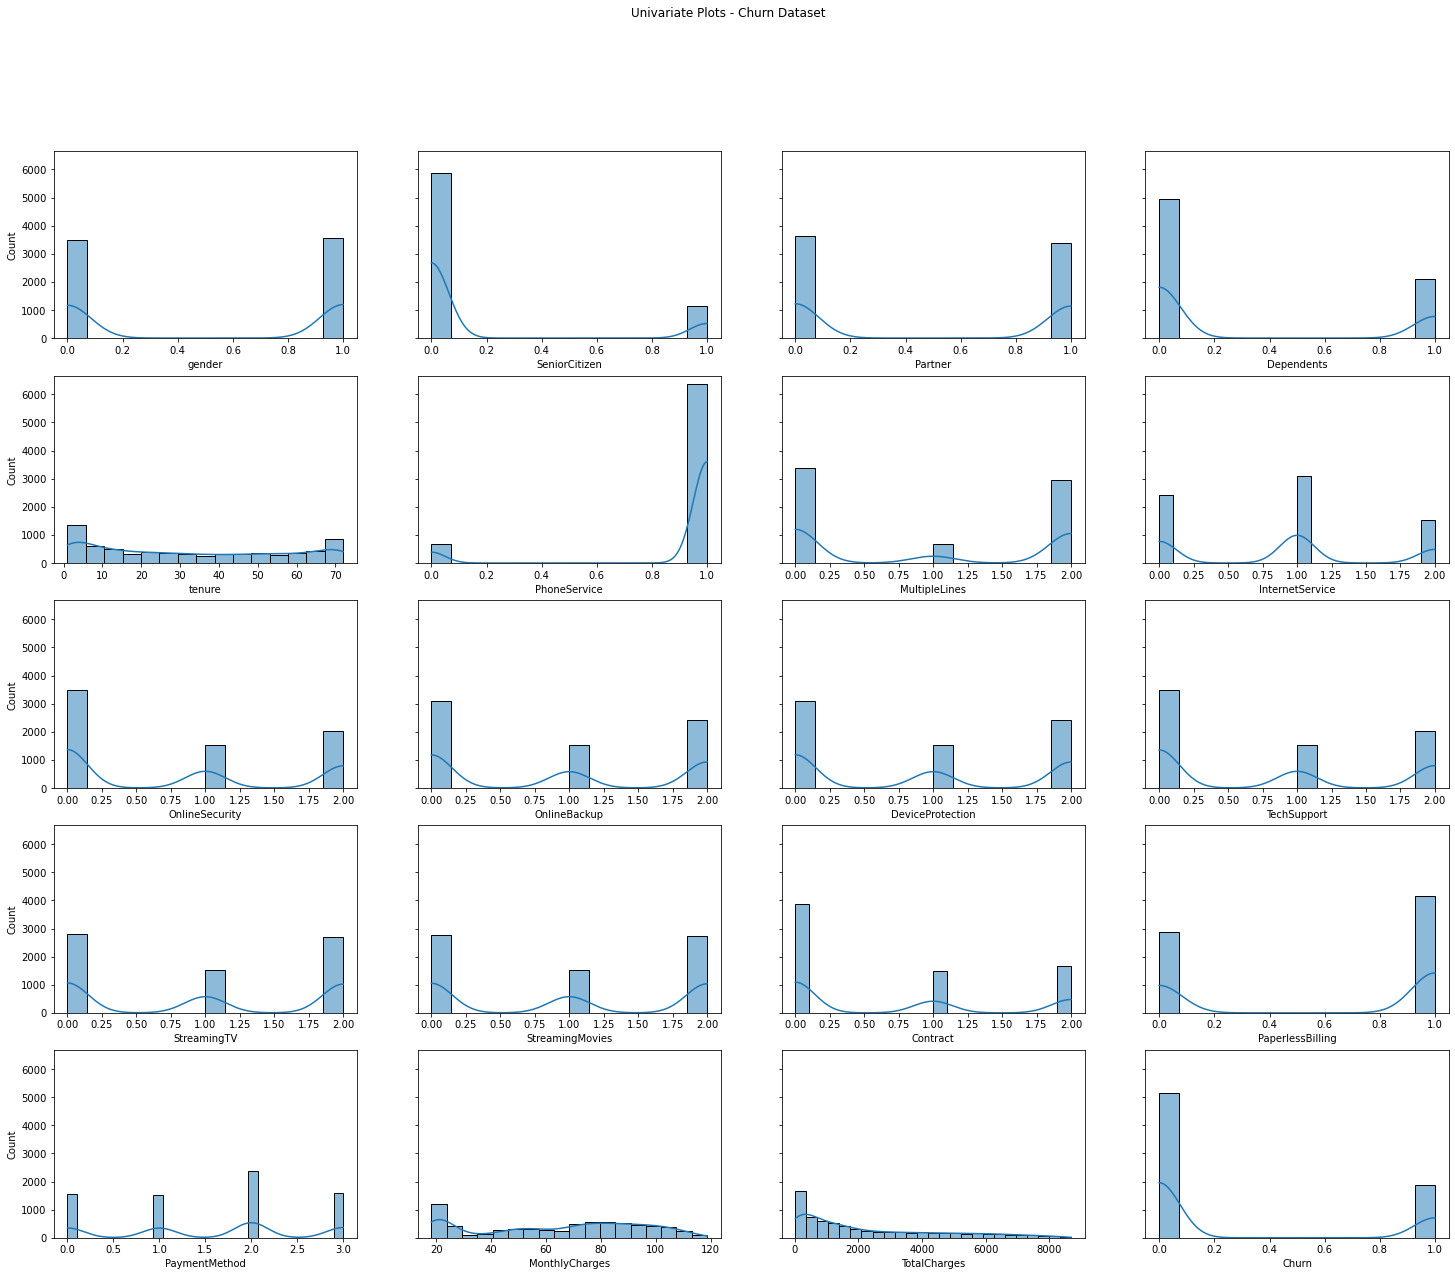

In [22]:
# Univariate Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, axes = plt.subplots(5, 4, figsize=(25, 20), sharey=True)
fig.suptitle('Univariate Plots - Churn Dataset')

j = 0
k = 0
for i in df.columns:
    sns.histplot(ax = axes[j,k], data = df, x= i, kde=True)
    k += 1
    if k > 3:
        k = 0
        j += 1


In [23]:
# Bivariate Plot

correlation = df.corr()
correlation

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


<AxesSubplot:>

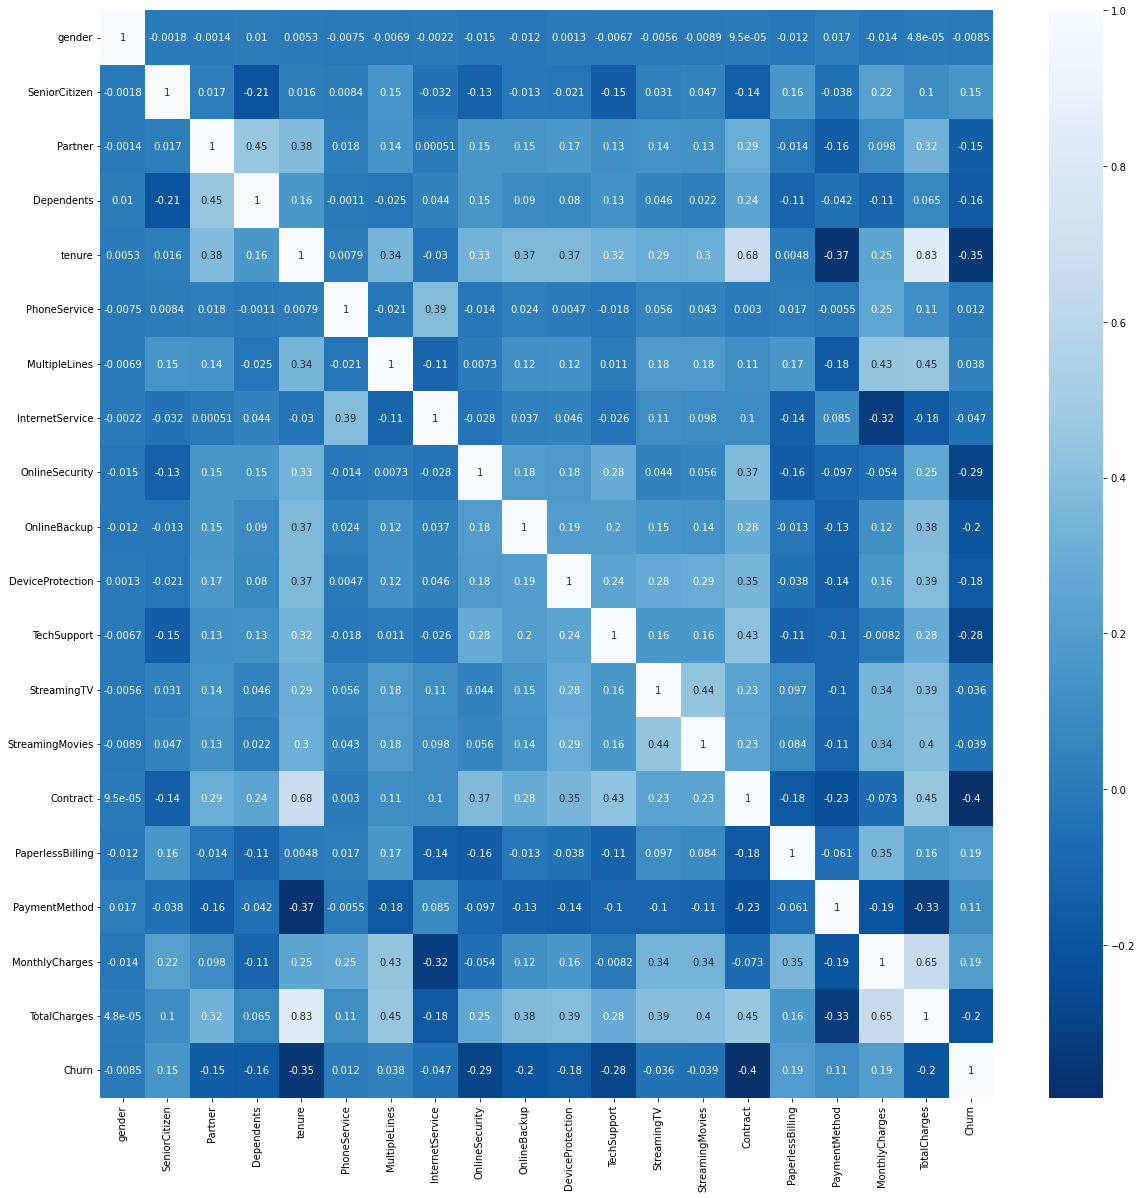

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cmap = 'Blues_r', annot = True )

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

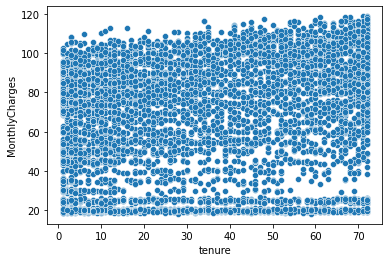

In [25]:
# As we have already identified the  Continuous Variables: ['tenure', 'MonthlyCharges']
# We can check the scatter for those continuous variables

sns.scatterplot(x = 'tenure', y = 'MonthlyCharges', data = df)

##### We don't see any relation between two continuous variables

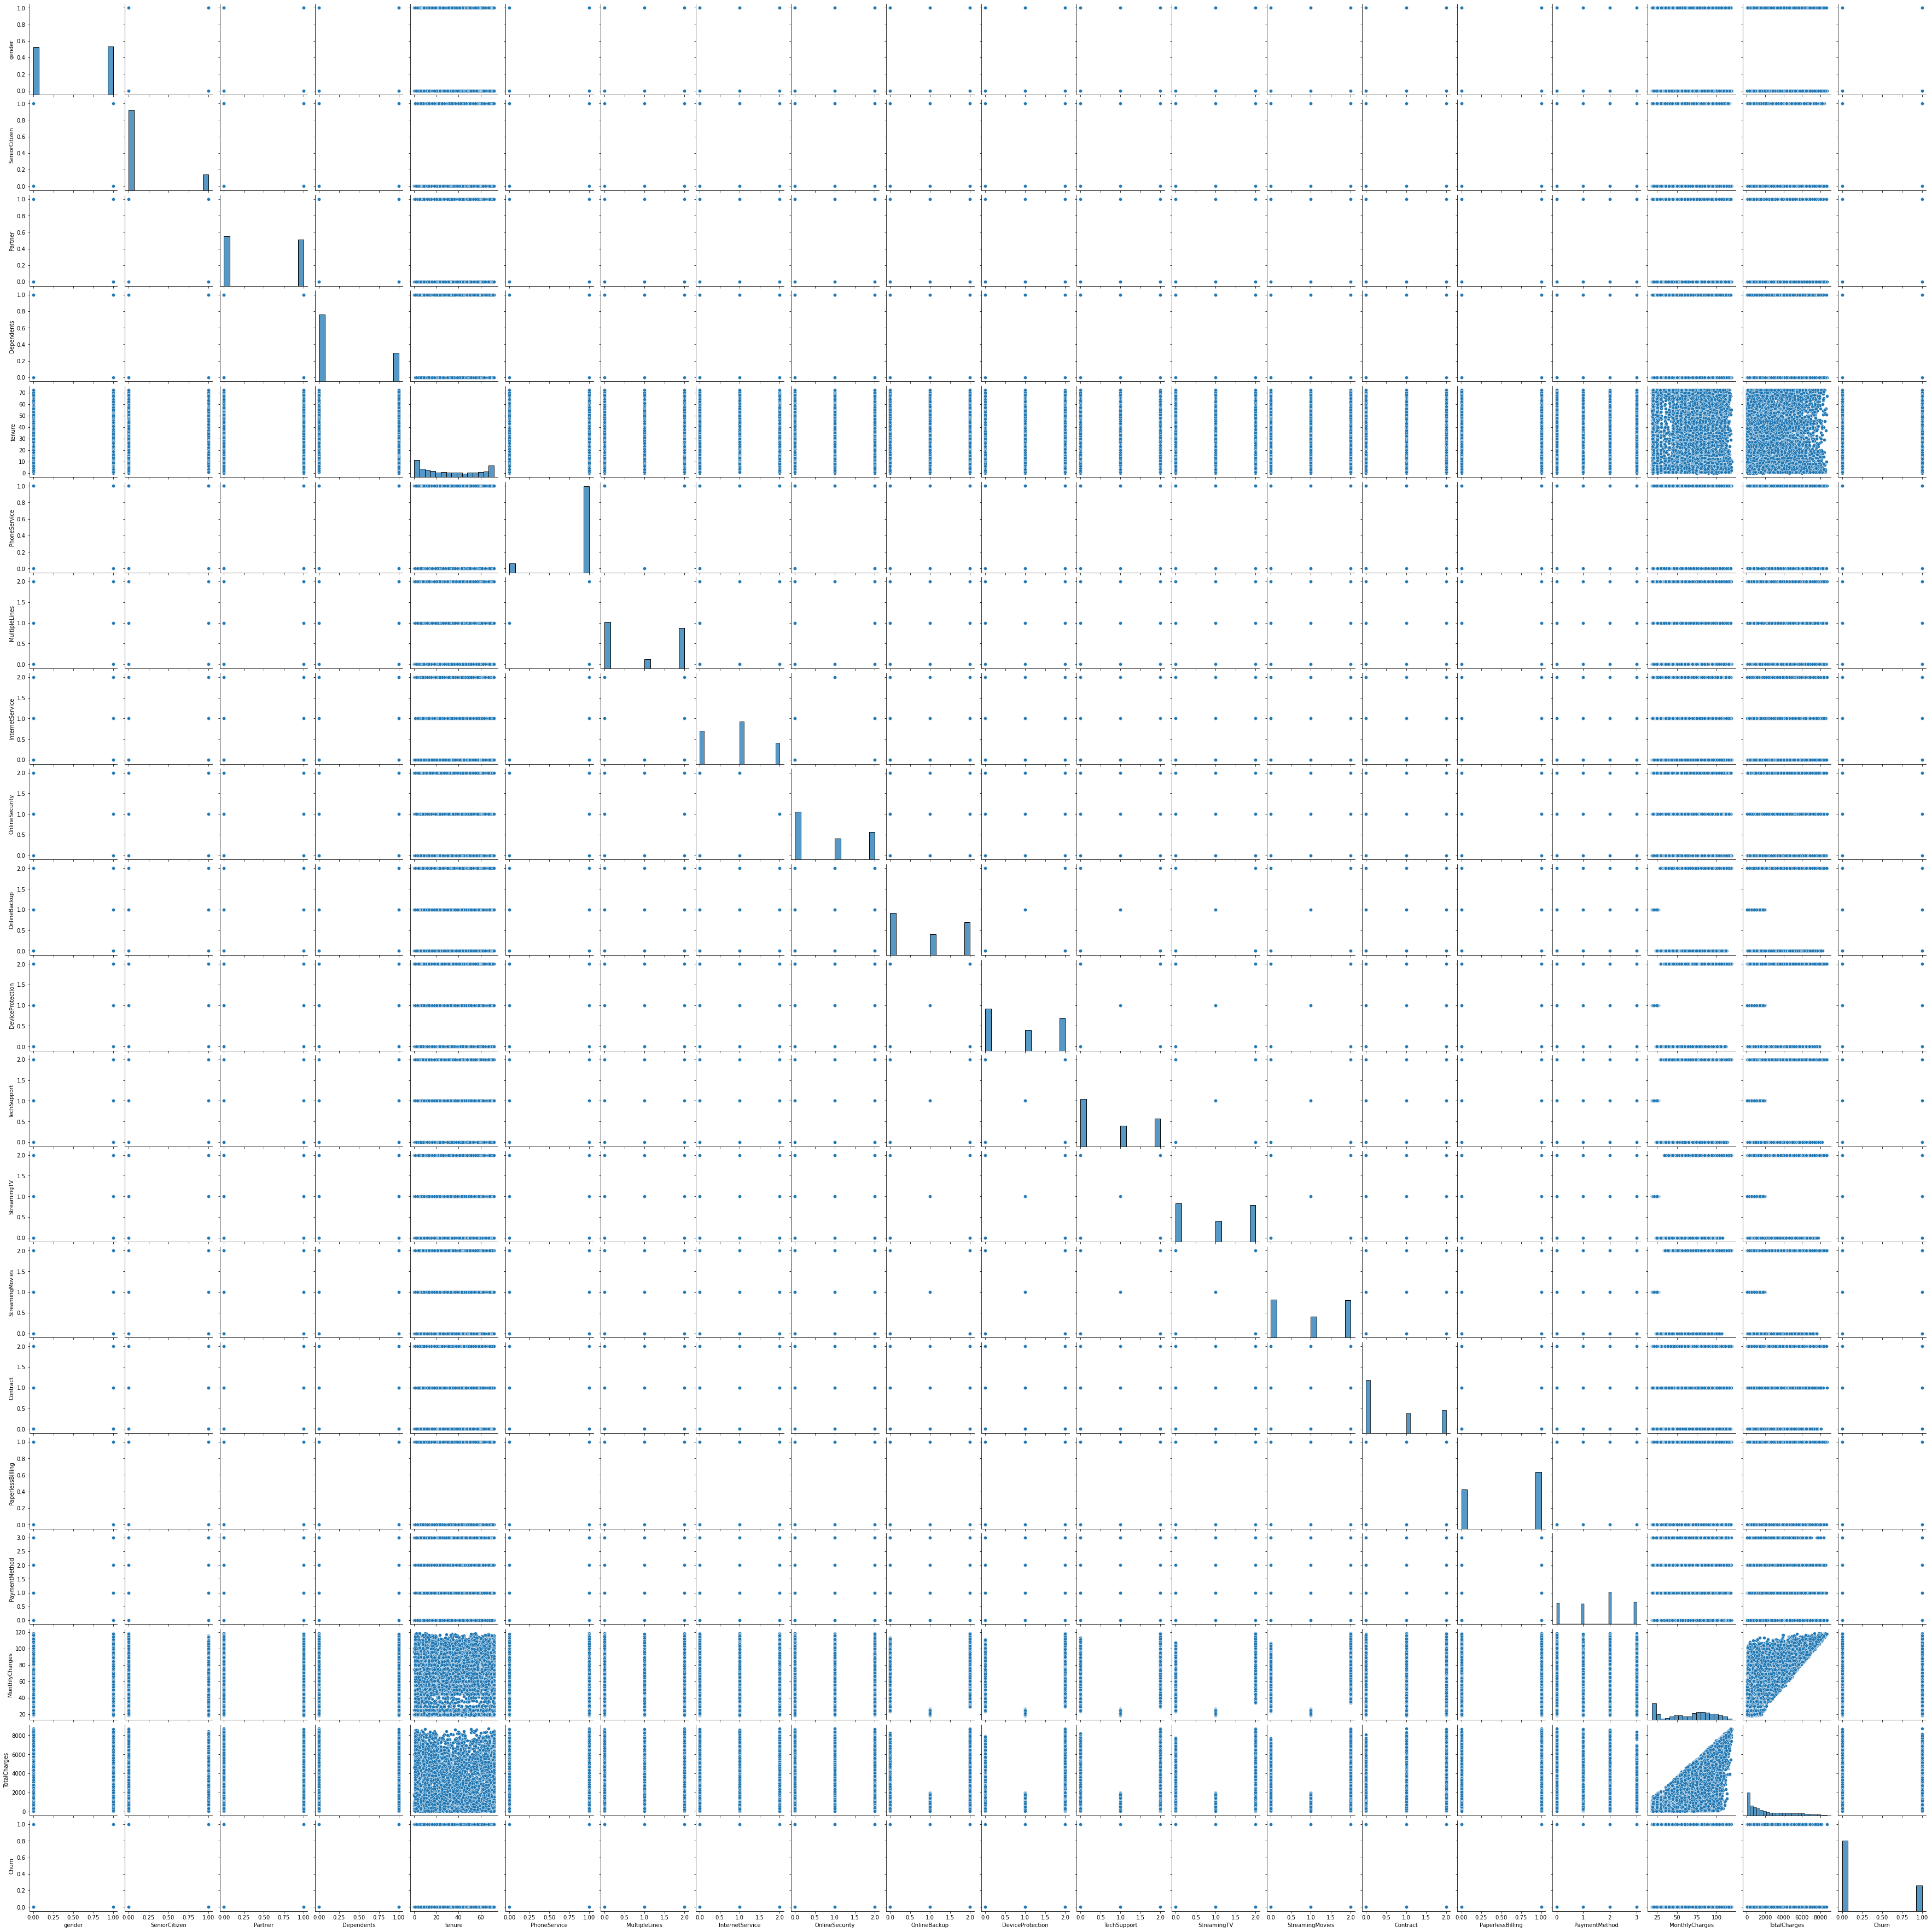

In [15]:
### Multivariate Plot

sns.pairplot(df)

### Feature Splitting: 

- Segregate predictors vs target attributes
- Check for target balancing and fix it if found imbalanced.
- Perform train-test split.
- Check if the train and test data have similar statistical characteristics when compared with original data.


In [26]:
# Data split: Independent vs target variable

y = df['Churn']                  # Target variable
X = df.drop(['Churn'],axis=1)    # Predictor variable

In [27]:
### Target Balancing

y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

### The target column is not balanced, so utilizing SMOTE for balancing the target column

In [28]:
from imblearn.over_sampling import SMOTE

count = y.value_counts()
print('Before sampling: \n', count)

smote = SMOTE()
X_sam,y_sam = smote.fit_resample(X, y)

count_sam = y_sam.value_counts()
print('After sampling: \n', count_sam)

Before sampling: 
 0    5163
1    1869
Name: Churn, dtype: int64
After sampling: 
 0    5163
1    5163
Name: Churn, dtype: int64


In [38]:
# Test Train Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sam, y_sam, test_size=0.20, random_state=42, stratify=y_sam)  

In [39]:
# Scaling - As most of the data is not normally distributed, z-score(standard) scaling to be used

from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X_train)   # Scale train data
X_test_scaled = StandardScaler().fit_transform(X_test)     # Scale test data

In [42]:
# Saving X_test_scaled and y_test for future use
X_test_df = pd.DataFrame(X_test_scaled)
X_test_df.to_csv('data/test_data.csv', index = False)
y_test.to_csv('data/target_data.csv', index= False)

<AxesSubplot:>

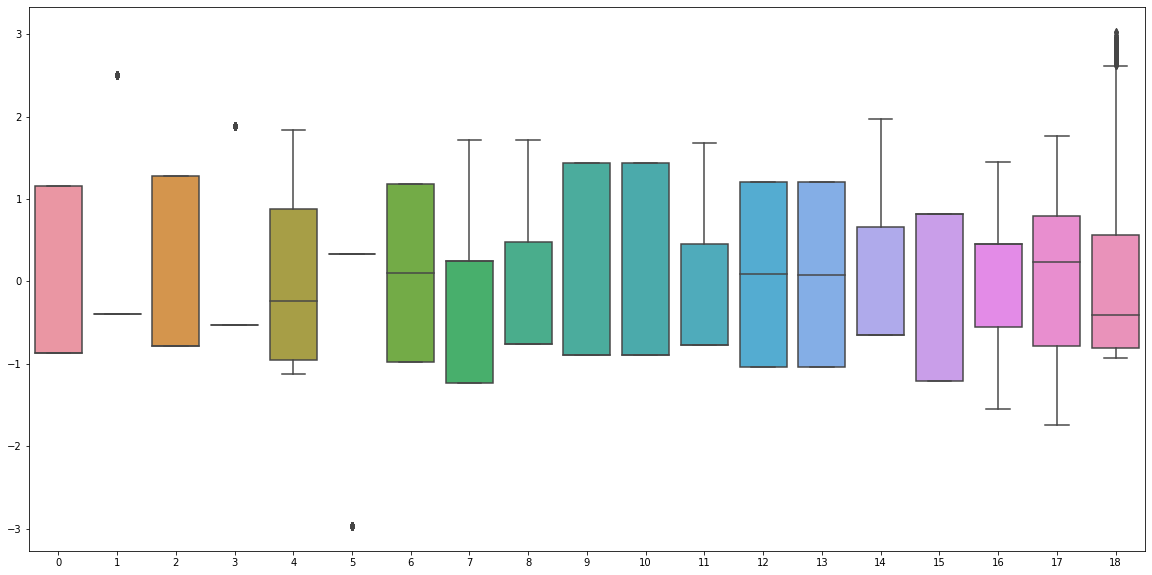

In [43]:
# Checking Outliers
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(data = X_train_scaled)

<AxesSubplot:>

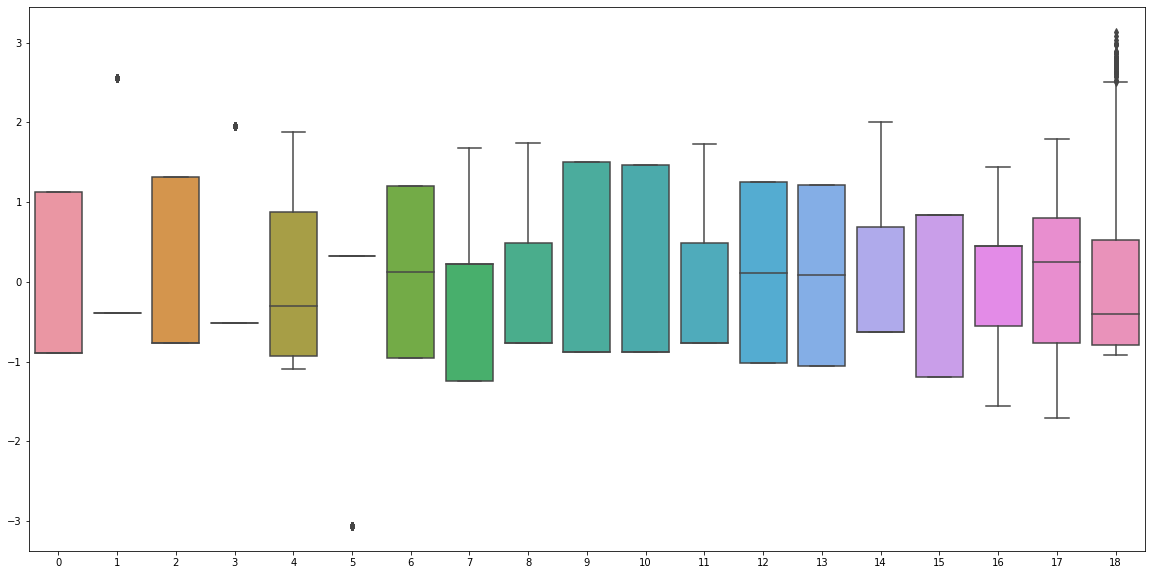

In [44]:
# Checking Outliers
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(data = X_test_scaled)

### There are very few otuliers in the independent features which is not going to cause a big impact in the model performace

### Model training, testing and tuning: 

- Training and Testing with all the classification models. 
- Displaying the classification accuracies for train and test data.
- Applying all the possible tuning techniques to train the best model for the given data. 
- Displaying and comparing all the models designed with the respective train and test accuracies.
- Selecting the final best trained model along with your detailed comments for selecting the model. 
- Pickling the selected model for future use.

In [45]:
# Model 
from sklearn. linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier 
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [46]:
# Defining the classification metrics

def get_metrics(y_true, y_pred, y_pred_prob):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    entropy = log_loss(y_true, y_pred_prob)
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2), 'entropy': round(entropy, 2)}

In [47]:
# ROC plot

def create_roc_auc_plot(clf, X_data, y_data):
    import matplotlib.pyplot as plt
    from sklearn import metrics
    metrics.plot_roc_curve(clf, X_data, y_data) 
    plt.savefig('images/roc_auc_curve.png')

In [48]:
# Confusion Matrix

def create_confusion_matrix_plot(clf, X_test, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
    plot_confusion_matrix(clf, X_test, y_test)
    plt.savefig('imaages/confusion_matrix.png')

In [49]:
def model(X_train, y_train, X_test, y_test):
    
    # Logistic Regression
    Log_Reg = LogisticRegression()
    Log_Reg.fit(X_train, y_train)
    Log_tr_acc = Log_Reg.score(X_train, y_train)
    Log_te_acc = Log_Reg.score(X_test, y_test)
    print('Logistic Regression Accuracy')
    print('Train_acc:', Log_tr_acc, 'Test_acc', Log_te_acc)
    print('-'*100)

    # Gaussian NaiveBayes
    NB = GaussianNB()
    NB.fit(X_train, y_train)
    NB_tr_acc = NB.score(X_train, y_train)
    NB_te_acc = NB.score(X_test, y_test)
    print('NB Accuracy')
    print('Train_acc:', NB_tr_acc, 'Test_acc', NB_te_acc)
    print('-'*100)
    
    # Support Vector Classifier
    SVM = SVC(C=0.8,kernel='linear',probability=True)
    SVM.fit(X_train, y_train)
    SVM_tr_acc=SVM.score(X_train, y_train)
    SVM_te_acc=SVM.score(X_test, y_test)
    print('SVM Accuracy')
    print('Train_acc:', SVM_tr_acc, 'Test_acc', SVM_te_acc)
    print('-'*100)

    # KNN
    n = list(np.arange(3,20,2))
    acc = []
    for k in n:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        # predict the response
        y_pred = knn.predict(X_test)
        # evaluate accuracy
        scores = accuracy_score(y_test, y_pred)
        acc.append(scores)
    # changing to misclassification error
    MSE = [1 - x for x in acc]
    # determining the best 'k' value
    optimal_k = n[MSE.index(min(MSE))]
    # Training with optimal 'k'
    KNN = KNeighborsClassifier(n_neighbors=optimal_k)
    KNN.fit(X_train, y_train)
    KNN_tr_acc=KNN.score(X_train, y_train)
    KNN_te_acc=KNN.score(X_test, y_test)
    print('KNN Accuracy')
    print('Train_acc:', KNN_tr_acc, 'Test_acc', KNN_te_acc)
    print('-'*100)

    # Decision Tree Classifier
    DT = DecisionTreeClassifier()
    DT.fit(X_train, y_train)
    DT_tr_acc=DT.score(X_train, y_train)
    DT_te_acc=DT.score(X_test, y_test)
    print('DT Accuracy')
    print('Train_acc:', DT_tr_acc, 'Test_acc', DT_te_acc)
    print('-'*100)

    # Bagging Classifier
    BG = BaggingClassifier()
    BG.fit(X_train, y_train)
    BG_tr_acc=BG.score(X_train, y_train)
    BG_te_acc=BG.score(X_test, y_test)
    print('BG Accuracy')
    print('Train_acc:', BG_tr_acc, 'Test_acc', BG_te_acc)
    print('-'*100)

    # Random Forest Classifier
    RF = RandomForestClassifier()
    RF.fit(X_train, y_train)
    RF_tr_acc=RF.score(X_train, y_train)
    RF_te_acc=RF.score(X_test, y_test)
    print('RF Accuracy')
    print('Train_acc:', RF_tr_acc, 'Test_acc', RF_te_acc)
    print('-'*100)

    # Gradient Boosting Classifier
    GB = GradientBoostingClassifier()
    GB.fit(X_train, y_train)
    GB_tr_acc=GB.score(X_train, y_train)
    GB_te_acc=GB.score(X_test, y_test)
    print('GB Accuracy')
    print('Train_acc:', GB_tr_acc, 'Test_acc', GB_te_acc)
    print('-'*100)

    # Ada Boost Classifier
    AB = AdaBoostClassifier()
    AB.fit(X_train, y_train)
    AB_tr_acc=AB.score(X_train, y_train)
    AB_te_acc=AB.score(X_test, y_test)
    print('AB Accuracy')
    print('Train_acc:', AB_tr_acc, 'Test_acc', AB_te_acc)
    print('-'*100)

    return (Log_tr_acc, Log_te_acc, NB_tr_acc, NB_te_acc, SVM_tr_acc, SVM_te_acc, KNN_tr_acc, KNN_te_acc, DT_tr_acc, DT_te_acc, 
            BG_tr_acc, BG_te_acc, RF_tr_acc, RF_te_acc, GB_tr_acc, GB_te_acc, AB_tr_acc, AB_te_acc)

In [50]:
LR_Tr, LR_Te, NB_Tr, NB_Te, SVM_Tr, SVM_Te, KNN_Tr, KNN_Te, DT_Tr, DT_Te, BG_Tr, BG_Te, RF_Tr, RF_Te, GB_Tr, GB_Te, AB_Tr, AB_Te = model(X_train_scaled, y_train, X_test_scaled, y_test)

Logistic Regression Accuracy
Train_acc: 0.8076271186440678 Test_acc 0.78702807357212
----------------------------------------------------------------------------------------------------
NB Accuracy
Train_acc: 0.7837772397094431 Test_acc 0.7725072604065828
----------------------------------------------------------------------------------------------------
SVM Accuracy
Train_acc: 0.8021791767554479 Test_acc 0.78702807357212
----------------------------------------------------------------------------------------------------
KNN Accuracy
Train_acc: 0.825544794188862 Test_acc 0.7942884801548886
----------------------------------------------------------------------------------------------------
DT Accuracy
Train_acc: 0.9990314769975787 Test_acc 0.7439496611810261
----------------------------------------------------------------------------------------------------
BG Accuracy
Train_acc: 0.9894673123486682 Test_acc 0.7942884801548886
-------------------------------------------------------------

#### On comparing the model performance almost all the models test accuracy is around 80%. Decision Tree and Random Forest is overfitting, because it is not tuned properly. For further hyper parameter tuning, let us consider Random Forest model and continue with further analysis

In [51]:
# Hyper parameter tuning

def hyper_parameter_tuning(X_train, y_train):
    # define random parameters grid
    n_estimators = [5,21,51,101] # number of trees in the random forest
    max_features = ['auto', 'sqrt'] # number of features in consideration at every split
    max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
    min_samples_split = [2, 6, 10] # minimum sample number to split a node
    min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
    bootstrap = [True, False] # method used to sample data points

    random_grid = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'bootstrap': bootstrap
                  }
    
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier()
    model_tuning = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,
                   n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
    model_tuning.fit(X_train, y_train)

    print ('Random grid: ', random_grid, '\n')
    # print the best parameters
    print ('Best Parameters: ', model_tuning.best_params_, ' \n')

    best_params = model_tuning.best_params_
    
    n_estimators = best_params['n_estimators']
    min_samples_split = best_params['min_samples_split']
    min_samples_leaf = best_params['min_samples_leaf']
    max_features = best_params['max_features']
    max_depth = best_params['max_depth']
    bootstrap = best_params['bootstrap']
    
    model_tuned = RandomForestClassifier(n_estimators = n_estimators, min_samples_split = min_samples_split,
                                         min_samples_leaf= min_samples_leaf, max_features = max_features,
                                         max_depth= max_depth, bootstrap=bootstrap) 
    model_tuned.fit( X_train, y_train)
    return model_tuned,best_params

In [52]:
Tuned_model, best_params = hyper_parameter_tuning(X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=21; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=21; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total tim

In [53]:
# Predicting the output with the tuned model

y_pred = Tuned_model.predict(X_test_scaled)
y_pred_prob = Tuned_model.predict_proba(X_test_scaled)
get_metrics(y_test, y_pred, y_pred_prob)


{'accuracy': 0.82, 'precision': 0.82, 'recall': 0.81, 'entropy': 0.43}

In [54]:
# Saving the best models for future use

import joblib

filename = 'models/Tuned_model.sav'
joblib.dump(Tuned_model, filename)

print(Fore.GREEN+"\nCompleted pickling the model")


Completed pickling the model


In [55]:
# Reloading the data again for predicting the results

X_test_scaled = pd.read_csv('data/test_data.csv')
y_test = pd.read_csv('data/target_data.csv')

In [56]:
# Loading the model for further testing
import joblib

Tuned_model = joblib.load('models/Tuned_model.sav')
print(Fore.GREEN+"\nReloaded the pickled model")

y_pred = Tuned_model.predict(X_test_scaled)
y_pred_prob = Tuned_model.predict_proba(X_test_scaled)

print('Tuned_Model:', get_metrics(y_test, y_pred, y_pred_prob))


Reloaded the pickled model
Tuned_Model: {'accuracy': 0.82, 'precision': 0.82, 'recall': 0.81, 'entropy': 0.43}


/Users/gowthamswaminathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/gowthamswaminathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


/Users/gowthamswaminathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/gowthamswaminathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


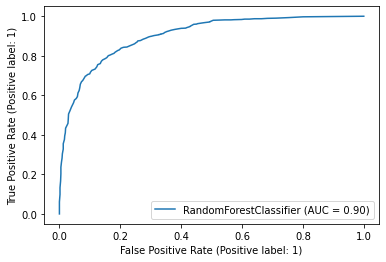

In [57]:
# ROC Plot

create_roc_auc_plot(Tuned_model, X_test_scaled, y_test)

/Users/gowthamswaminathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/gowthamswaminathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


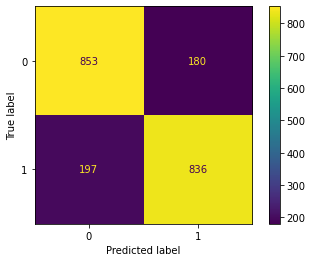

In [58]:
# Confusion Matrix

create_confusion_matrix_plot(Tuned_model, X_test_scaled, y_test)

# MLflow Implementation

### if we want to use the model registry feature, we need a database.

#### _If you have sqlite installed then you can use the below command:_

1. Start MLflow tracking server using sqlite as a backend tracking store.

`mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./artifacts --host 0.0.0.0 --port 5001`


2. Set the MLflow tracking uri (within code section).
    
    mlflow.set_tracking_uri("http://localhost:5001")

- You can also follow the official documentation for more information on backend database for model registry

https://www.mlflow.org/docs/latest/model-registry.html#model-registry-workflows

In [59]:
# Naming the experiments for MLflow Tuned model
from datetime import datetime
experiment_name = "Tuned_classifier"+ str(datetime.now().strftime("%d-%m-%y")) ##basic classifier
run_name="Tuned_Model_Randomized_Search"+ str(datetime.now().strftime("%d-%m-%y"))
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)
run_params = best_params

In [60]:
### Function to create an experiment in MLFlow and log parameters, metrics and artifacts files like images etc.

def create_experiment_tuned(experiment_name,run_name, run_metrics, model, confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    import mlflow
    mlflow.set_tracking_uri("http://localhost:5001") #uncomment this line if you want to use any database like sqlite as backend storage for model
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run():
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        mlflow.sklearn.log_model(model, "model")
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Tuned_Model")
        mlflow.set_tags({"tag2":"Tuned_EST_Model", "tag3":"Binary_Classification_Production"})
            
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))

In [61]:
create_experiment_tuned(experiment_name,run_name,run_metrics,Tuned_model, run_params=run_params, confusion_matrix_path = 'images/confusion_matrix.png', roc_auc_plot_path = 'images/roc_auc_curve.png')

2023/01/17 19:27:55 INFO mlflow.tracking.fluent: Experiment with name 'Tuned_classifier17-01-23' does not exist. Creating a new experiment.


Run - Tuned_Model_Randomized_Search17-01-23 is logged to Experiment - Tuned_classifier17-01-23


/Users/gowthamswaminathan/.local/lib/python3.7/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [62]:
# Predicting the test data with the logged_model from MLFlow
import mlflow
logged_model = 'runs:/a9883808861f4845854557fe301dbbfe/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(X_test_scaled))

/Users/gowthamswaminathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1, 0, 0, ..., 1, 1, 0])

### Adding an MLflow Model to the Model Registry
Reference: https://www.mlflow.org/docs/latest/model-registry.html
- We can use the mlflow.<model_flavor>.log_model() method

In [63]:
def create_exp_and_register_model(experiment_name,run_name,run_metrics,model,confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    mlflow.set_tracking_uri("http://localhost:5001") 
    #use above line if you want to use any database like sqlite as backend storage for model else comment this line
    mlflow.set_experiment(experiment_name)
    with mlflow.start_run(run_name=run_name) as run:
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Tuned_EST_Model")
        mlflow.set_tags({"tag2":"Randomized Search CV", "tag3":"Production"})
        mlflow.sklearn.log_model(model, "model",registered_model_name="Churn-classifier")

In [64]:
experiment_name = "Churn_Classifier" + str(datetime.now().strftime("%d-%m-%y")) ##Tuned classifier
run_name="Churn_Classifier_Tuned_Model" +str(datetime.now().strftime("%d-%m-%y"))
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)
run_params = best_params
print(run_metrics)
create_exp_and_register_model(experiment_name,run_name,run_metrics,Tuned_model, run_params=run_params, confusion_matrix_path = 'confusion_matrix.png', roc_auc_plot_path = 'roc_auc_curve.png')

2023/01/17 19:28:43 INFO mlflow.tracking.fluent: Experiment with name 'Churn_Classifier17-01-23' does not exist. Creating a new experiment.


{'accuracy': 0.82, 'precision': 0.82, 'recall': 0.81, 'entropy': 0.43}


Registered model 'Churn-classifier' already exists. Creating a new version of this model...
2023/01/17 19:28:49 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Churn-classifier, version 2
Created version '2' of model 'Churn-classifier'.


### Fetching model from model_registry

In [65]:
import mlflow.pyfunc

model_name = "Churn-classifier"
model_version = 2

model = mlflow.pyfunc.load_model(
    model_uri=f"models:/{model_name}/{model_version}"
)

y_pred = model.predict(X_test_scaled)
print(y_pred)

sklearn_model = mlflow.sklearn.load_model(
    model_uri=f"models:/{model_name}/{model_version}"
)
y_pred_prob = sklearn_model.predict_proba(X_test_scaled)
print(y_pred_prob)

[1 0 0 ... 1 1 0]
[[0.44554455 0.55445545]
 [0.88118812 0.11881188]
 [0.82178218 0.17821782]
 ...
 [0.01980198 0.98019802]
 [0.40594059 0.59405941]
 [0.52475248 0.47524752]]


/Users/gowthamswaminathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/gowthamswaminathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


#### Transitioning an MLflow Model’s Stage

In [66]:
client = mlflow.tracking.MlflowClient()
client.transition_model_version_stage(
    name="Churn-classifier",
    version=2,
    stage="Production"
)

<ModelVersion: creation_timestamp=1673963929143, current_stage='Production', description='', last_updated_timestamp=1673963984550, name='Churn-classifier', run_id='966a739664664628bf34e92345deb1bb', run_link='', source='./artifacts/8/966a739664664628bf34e92345deb1bb/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='2'>

In [67]:
import mlflow.pyfunc

model_name = "Churn-classifier"
stage = 'Production'

model = mlflow.pyfunc.load_model(
    model_uri=f"models:/{model_name}/{stage}"
)

y_pred = model.predict(X_test_scaled)
print(y_pred)

### Converting the results of the prediction to 'Yes' / 'No' which explains whether the customer leave with in last month or not
churn = []
for i in y_pred:
    if i == 0:
        j = 'No'
    else:
        j = 'Yes'
    churn.append(j)
print(churn)

[1 0 0 ... 1 1 0]
['Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Y

/Users/gowthamswaminathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### MLFlow Model Serving

**Run this from command line**
-  use `set MLFLOW_TRACKING_URI=http://localhost:5001` for windows
- use `export MLFLOW_TRACKING_URI=http://localhost:5001` if in linux/mac

## **Now run this command from command line**

make sure we use to write the different port - other than the one you used while starting mlflow server

`mlflow models serve --model-uri models:/Churn-classifier/Production -p 6000 --env-manager=local`

In [2]:
import pandas as pd
X_test_scaled = pd.read_csv('data/test_data.csv')
X_test_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.127089,-0.391849,-0.760463,1.959185,-1.093201,-3.062990,0.123733,-1.238709,-0.762357,-0.874327,-0.874779,-0.760055,-1.015848,-1.048889,-0.631397,-1.188929,1.446339,-1.504971,-0.909823
1,1.127089,-0.391849,1.314988,1.959185,0.626244,0.326478,-0.954883,-1.238709,1.741665,1.507162,-0.874779,-0.760055,-1.015848,-1.048889,-0.631397,-1.188929,1.446339,-0.447794,0.155377
2,1.127089,-0.391849,-0.760463,-0.510416,-1.093201,0.326478,-0.954883,1.682721,0.489654,0.316417,0.298788,0.482250,0.116160,0.082115,-0.631397,-1.188929,1.446339,-1.660233,-0.911904
3,-0.887241,-0.391849,1.314988,-0.510416,-0.380261,0.326478,-0.954883,1.682721,0.489654,0.316417,0.298788,0.482250,0.116160,0.082115,2.006554,-1.188929,1.446339,-1.648021,-0.747817
4,-0.887241,-0.391849,-0.760463,-0.510416,-0.212510,0.326478,-0.954883,-1.238709,-0.762357,1.507162,-0.874779,1.724555,-1.015848,-1.048889,-0.631397,-1.188929,-0.554422,-0.425115,-0.362440


In [3]:
# Predicting the results using endpiont created by serving the model

import requests
lst = X_test_scaled.values.tolist()
inference_request = {
        "data": lst
}
endpoint = "http://localhost:6000/invocations"
response = requests.post(endpoint, json=inference_request)
print(response)

<Response [200]>


In [4]:
print(response.text)

[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 

### In the above result '0' represents 'No' in churn column, which means the customers who did not leave within the last month and '1' viceversa